In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
df1 = pd.read_csv("/Users/nickolaykrasnenko/Documents/GitHub/SnowFlake/Python_Analysis/NewPractice/products.csv")
df2 = pd.read_csv("/Users/nickolaykrasnenko/Documents/GitHub/SnowFlake/Python_Analysis/NewPractice/stores.csv")
df3 = pd.read_csv("/Users/nickolaykrasnenko/Documents/GitHub/SnowFlake/Python_Analysis/NewPractice/transaction_1.csv")
df4 = pd.read_csv("/Users/nickolaykrasnenko/Documents/GitHub/SnowFlake/Python_Analysis/NewPractice/transaction_2.csv")
df5 = pd.read_csv("/Users/nickolaykrasnenko/Documents/GitHub/SnowFlake/Python_Analysis/NewPractice/transaction_items_1.csv")
df6 = pd.read_csv("/Users/nickolaykrasnenko/Documents/GitHub/SnowFlake/Python_Analysis/NewPractice/transaction_items_2.csv")

In [3]:
df6.shape[0]

49116

In [4]:
transactions = pd.merge(df3, df4, on="transaction_id")

transactions["store_id"] = transactions["store_id"].astype("Int64")

transactions["transaction_date"] = pd.to_datetime(transactions["transaction_date"])

transactions.sort_values("transaction_date", ascending=False).iloc[0]["store_id"]

8

In [5]:
df6.columns = df5.columns

transaction_items = pd.concat([df5, df6], ignore_index=True)

transaction_items[transaction_items["unit_price"] <= transaction_items["unit_price"].mean()]["transaction_qty"].sum()

143111

In [6]:
df1.duplicated().sum()

1

In [7]:
df1 = df1.drop_duplicates('product_id')

df = pd.merge(transaction_items, df1, on="product_id", how="left")

df = pd.merge(df, transactions, on="transaction_id", how="left")

df = pd.merge(df, df2, on="store_id", how="left")

df

,transaction_id,product_id,transaction_qty,unit_price,product_category,product_type,product_name,product_size,transaction_date,store_id,store_location
0,1,32,2,3.00,Coffee,Gourmet brewed coffee,Ethiopia,Regular,2023-01-01 07:06:11,5,Lower Manhattan
1,2,57,2,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,2023-01-01 07:08:56,5,Lower Manhattan
2,3,59,2,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate,Large,2023-01-01 07:14:04,5,Lower Manhattan
3,4,22,1,2.00,Coffee,Drip coffee,Our Old Time Diner Blend,Small,2023-01-01 07:20:24,5,Lower Manhattan
4,5,57,2,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,2023-01-01 07:22:41,5,Lower Manhattan
...,...,...,...,...,...,...,...,...,...,...,...
149111,116787,44,2,2.50,Tea,Brewed herbal tea,Peppermint,Regular,2023-06-30 20:18:41,8,Hell's Kitchen
149112,116788,49,2,3.00,Tea,Brewed Black tea,English Breakfast,Large,2023-06-30 20:25:10,8,Hell's Kitchen
149113,116789,45,1,3.00,Tea,Brewed herbal tea,Peppermint,Large,2023-06-30 20:31:34,8,Hell's Kitchen
149114,116790,40,1,3.75,Coffee,Barista Espresso,Cappuccino,NaN,2023-06-30 20:57:19,8,Hell's Kitchen


In [8]:
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

df.dropna(subset=["transaction_date"]).sort_values("transaction_date")["transaction_date"].iloc[[0, -1]]
# df[df["transaction_date"].notnull()].sort_values("transaction_date")

0        2023-01-01 07:06:11
149115   2023-06-30 20:57:19
Name: transaction_date, dtype: datetime64[ns]

In [9]:
import matplotlib as plt

<Axes: xlabel='transaction_month'>

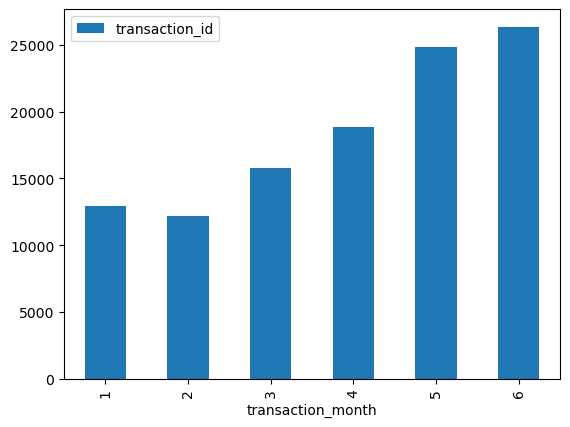

In [10]:
df["transaction_month"] = df["transaction_date"].dt.month.astype("Int64")

# par1 = df.groupby("transaction_month")["transaction_id"].nunique()
# par1 = df.groupby("transaction_month")["transaction_id"].agg("nunique")
# par1 = df.groupby("transaction_month")["transaction_id"].agg(lambda x: x.nunique())
par1 = df.pivot_table(index="transaction_month", values="transaction_id", aggfunc="nunique")

# par1.plot.bar()
par1.plot(kind="bar")

<Axes: >

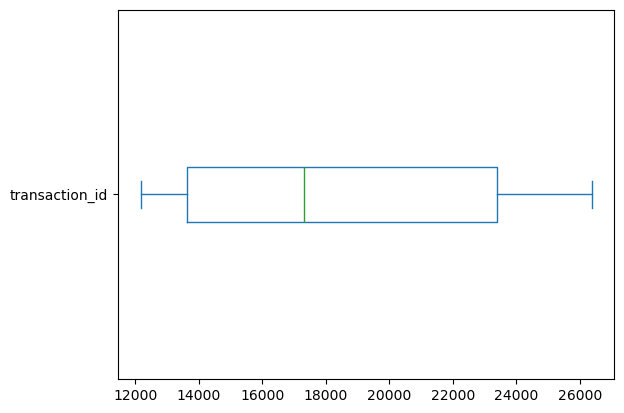

In [11]:
par1.plot(kind="box", vert=False)

<Axes: xlabel='transaction_qty', ylabel='unit_price'>

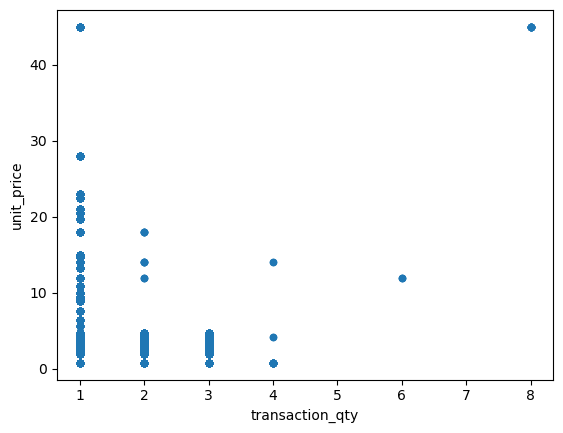

In [12]:
df.plot("transaction_qty", "unit_price", kind="scatter")

<Axes: ylabel='transaction_id'>

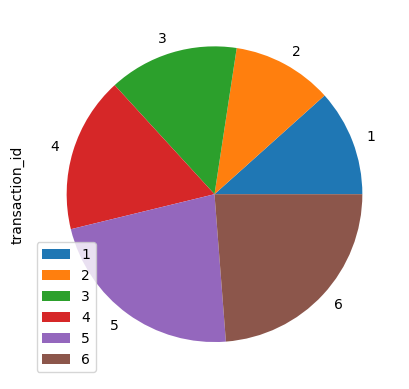

In [13]:
par1.plot(y="transaction_id", kind="pie")

<Axes: xlabel='transaction_day'>

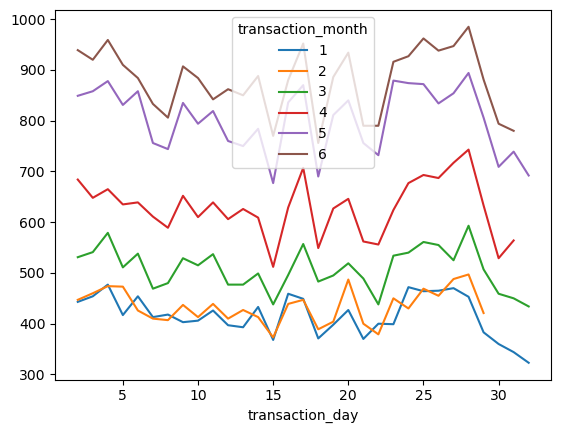

In [14]:
df["transaction_day"] = (df["transaction_date"].dt.day + 1).astype("Int64")

par2 = df.pivot_table(index="transaction_day", columns="transaction_month", values="transaction_id", aggfunc="nunique")

par2.plot()

<Axes: xlabel='transaction_day'>

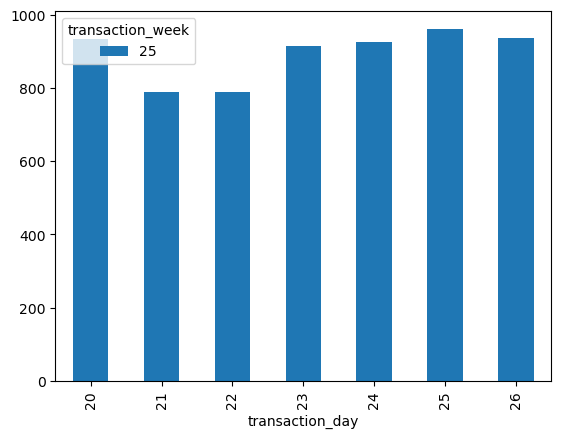

In [15]:
df["transaction_week"] = df["transaction_date"].dt.isocalendar().week

par3 = df.groupby("transaction_week")["transaction_id"].nunique()

par4 = df[df["transaction_week"] == par3.idxmax()].pivot_table(index="transaction_day",
    columns="transaction_week", values="transaction_id", aggfunc="nunique"
)

par4.plot(kind="bar")

# par4 = df.groupby("transaction_day")["transaction_id"].nunique()

period
AM    3660
PM    2597
Name: transaction_id, dtype: int64

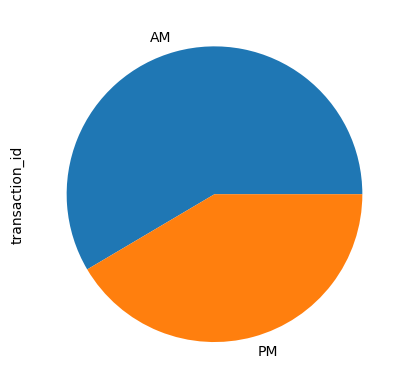

In [16]:
df["period"] = df["transaction_date"].apply(lambda x: "AM" if str(x)[11:16] <= "11:59" else "PM")

par5 = df[df["transaction_week"] == par3.idxmax()].groupby("period")["transaction_id"].nunique()

par5.plot(kind="pie")
par5

<Axes: >

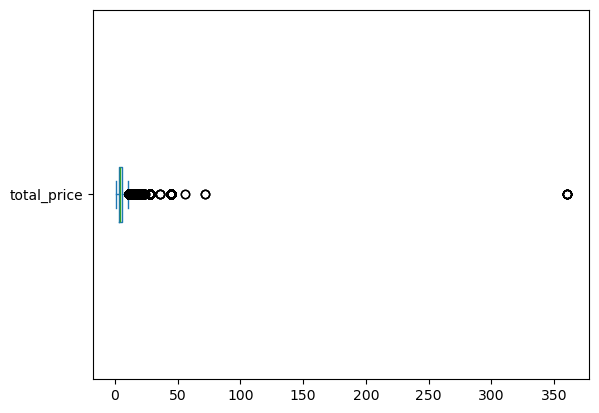

In [17]:
df["total_price"] = df["transaction_qty"] * df["unit_price"]

df["total_price"].plot(kind="box", vert=False)
# df["total_price"].plot(kind="hist")

<Axes: xlabel='transaction_qty', ylabel='total_price'>

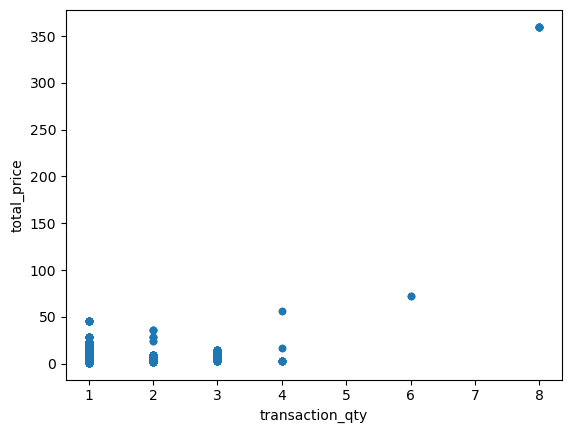

In [18]:
df.plot("transaction_qty", "total_price", kind="scatter")

In [19]:
par6 = df.groupby('store_location')["total_price"].sum().sort_values(ascending=False).round(1)

par6

store_location
Hell's Kitchen     225145.7
Astoria            220922.9
Lower Manhattan    218480.9
Name: total_price, dtype: float64

In [20]:
par7 = df.groupby('store_location')[["total_price", "transaction_id"]].agg({"total_price": "sum", "transaction_id": "nunique"})

par7["AOV"] = par7["total_price"] / par7["transaction_id"]

par7.sort_values("AOV", ascending=False)

,total_price,transaction_id,AOV
store_location,,,
Lower Manhattan,218480.93,33818,6.460492
Hell's Kitchen,225145.66,38437,5.857524
Astoria,220922.88,38695,5.709339


<Axes: xlabel='transaction_month'>

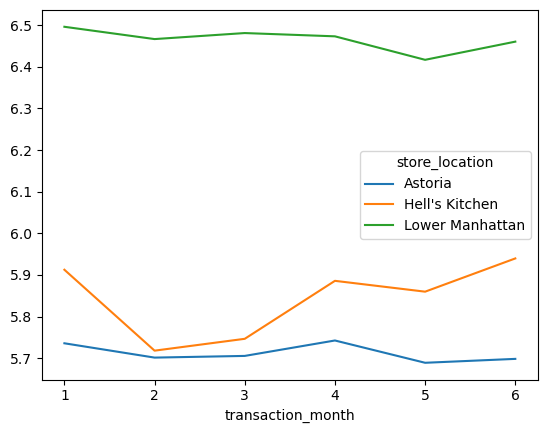

In [21]:
par8 = df.pivot_table(index="transaction_month", columns="store_location", values= "transaction_id", aggfunc="nunique")

par9 = df.pivot_table(index="transaction_month", columns="store_location", values= "total_price", aggfunc="sum")

par10 = pd.concat([par8, par9], ignore_index=False)


par10 = par9 / par8

par10.plot()

In [46]:
par11 = (df.groupby(["store_location", "product_name"])["total_price"].value_counts(normalize=True) * 100).round(2)

# par11["total_price"] = (df["total_price"].value_counts(normalize=True) * 100).round(2)
                                     
# par12 = par12.groupby("store_location").max()

par11


store_location   product_name            total_price
Astoria          Almond Croissant        3.75           98.80
                                         7.50            1.20
                 Brazilian               3.00           18.15
                                         2.20           17.64
                                         6.00           17.35
                                                        ...  
Lower Manhattan  Traditional Blend Chai  5.00           20.47
                                         6.00           20.35
                                         7.50            5.33
                                         9.00            2.79
                                         8.95            2.54
Name: proportion, Length: 461, dtype: float64